# DATA WRANGLING WITH PANDAS
## BASEBALL BATTING DATA SET
### RITI KUMARI (sinhariti61@gmail.com)

In [1]:
#1 Load in the appropriate csv file as a pandas dataframe (batting.csv)
import pandas as pd;
import numpy as np;
import datetime;
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

batting_df= pd.read_csv("Batting.csv")

#Some common values to be used later
batting_df = batting_df.fillna(0)

In [2]:
#2 Print out the dimensions and info about the dataframe you just created
batting_df.info()
batting_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102816 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102816 non-null float64
SB           102816 non-null float64
CS           102816 non-null float64
BB           102816 non-null int64
SO           102816 non-null float64
IBB          102816 non-null float64
HBP          102816 non-null float64
SH           102816 non-null float64
SF           102816 non-null float64
GIDP         102816 non-null

,birthYear,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000
mean,1932.991869,1964.262313,1.077838,51.343439,141.905511,18.815544,37.139930,6.289167,1.293252,2.813599,16.933853,2.939183,0.946312,13.067207,18.964665,0.712584,1.027194,2.157787,0.684670,2.223992
std,87.105524,38.856297,0.284366,47.121658,184.654492,28.242983,52.603757,9.662468,2.645770,6.304919,26.320186,7.675440,2.467947,20.746460,27.767047,2.293644,2.251523,4.145354,1.659088,4.290839
min,0.000000,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1905.000000,1934.000000,1.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1945.000000,1973.000000,1.000000,34.000000,49.000000,4.000000,9.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1969.000000,1998.000000,1.000000,80.000000,231.000000,27.000000,58.000000,9.000000,1.000000,2.000000,24.000000,2.000000,1.000000,18.000000,26.000000,0.000000,1.000000,3.000000,0.000000,2.000000
max,1996.000000,2016.000000,5.000000,165.000000,716.000000,192.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


In [3]:
#3 How many players have hit 40 or more HRs in one single season? (Number only)
PlayerGrouped = batting_df.groupby(['playerID','yearID'],as_index=False).agg({'HR' : "sum"})
PlayerHR40 = PlayerGrouped.loc[PlayerGrouped['HR'] >= 40]
len(PlayerHR40.drop_duplicates('playerID'))

142

In [4]:
#4 How many players have hit 600 or more HRs for their career? 
#(Dataframe with name and player first and last name only and amount of HRs)
PlayerGroup = batting_df.groupby(['playerID'],as_index=False).agg({'nameFirst' : "first",'nameLast' : "first",'HR' : "sum" })
PlayerHR600 = PlayerGroup[PlayerGroup['HR']>=600]
PlayerHR600.reset_index() #Resets the index

,index,playerID,nameFirst,nameLast,HR
0,1,aaronha01,Hank,Aaron,755
1,1542,bondsba01,Barry,Bonds,762
2,6633,griffke02,Ken,Griffey,630
3,10857,mayswi01,Willie,Mays,660
4,14528,rodrial01,Alex,Rodriguez,696
5,14865,ruthba01,Babe,Ruth,714
6,16103,sosasa01,Sammy,Sosa,609
7,17004,thomeji01,Jim,Thome,612


In [5]:
#5 How many unique players have hit 40 2Bs or more, 10 3Bs or more, 200 Hits or more, and 30 HRs or more in one season? 
#(Number Only)
PlayerGroup = batting_df.groupby(['playerID','yearID'],as_index=False).sum()
PlayerList = PlayerGroup.loc[(PlayerGroup['2B'] >= 40) & (PlayerGroup['3B'] >=10) & (PlayerGroup['H']>=200) & (PlayerGroup['HR'] >=30)]
len(PlayerList.drop_duplicates('playerID'))

11

In [6]:
#6 How many players seasons have had 100 or more SBs? 
#(Dataframe, first name, last name, yearID, number of SBs, ordered from descending SBs )
SeasonGroup = batting_df.groupby(['yearID','playerID'], as_index = False).agg({'nameFirst' : 'first' ,'nameLast' : 'first', 'SB' : 'sum'})
SeasonList = SeasonGroup[SeasonGroup['SB'] >= 100].sort_values('SB', ascending = False).reset_index()
#SeasonList = SeasonList.drop_duplicates('nameFirst').reset_index()
SeasonList[['nameFirst','nameLast','yearID','SB']]

,nameFirst,nameLast,yearID,SB
0,Hugh,Nicol,1887,138.0
1,Rickey,Henderson,1982,130.0
2,Arlie,Latham,1887,129.0
3,Lou,Brock,1974,118.0
4,Charlie,Comiskey,1887,117.0
5,John,Ward,1887,111.0
6,Billy,Hamilton,1889,111.0
7,Billy,Hamilton,1891,111.0
8,Vince,Coleman,1985,110.0
9,Vince,Coleman,1987,109.0


In [7]:
#7 How many players in the 1960s (yearID) have hit 200 or more HRs? 
#(Dataframe, first name, last name, number of HRs, ordered descending by HR amt)
PlayerGroup = batting_df[(batting_df['yearID']>=1960) & (batting_df['yearID'] < 1970)]
PlayerGroup2 = PlayerGroup.groupby(['playerID'], as_index = False).agg({'nameFirst' : 'first', 'nameLast' : 'first', 'HR' : 'sum'})
PlayerGroup2 = PlayerGroup2[PlayerGroup2['HR'] >= 200].reset_index()
PlayerGroup2 = PlayerGroup2.sort_values(by='HR', ascending = False).reset_index()
PlayerGroup2[['nameFirst','nameLast','HR']]

,nameFirst,nameLast,HR
0,Harmon,Killebrew,393
1,Hank,Aaron,375
2,Willie,Mays,350
3,Frank,Robinson,316
4,Willie,McCovey,300
5,Frank,Howard,288
6,Norm,Cash,278
7,Ernie,Banks,269
8,Mickey,Mantle,256
9,Orlando,Cepeda,254


In [8]:
#8 Who has hit the most HRs in history? (Dataframe, first name, last name, HRs)
Player = batting_df.groupby('playerID', as_index=False).agg({'nameFirst' : 'first' , 'nameLast' : 'first', 'HR' : 'sum'})
Player = Player.sort_values(by='HR', ascending = False).head(1)
Player[['nameFirst','nameLast','HR']]

,nameFirst,nameLast,HR
1542,Barry,Bonds,762


In [9]:
#9 Who had the most hits (H) in the 1970s? (Dataframe)
Player = batting_df[(batting_df['yearID'] >= 1970) & (batting_df['yearID'] < 1980)]
Player = Player.groupby('playerID', as_index= False).agg({'nameFirst' : 'first' , 'nameLast' : 'first', 'H' : 'sum'})
Player = Player.sort_values(by='H', ascending = False).head(1).reset_index()
Player[['nameFirst','nameLast','H']]

,nameFirst,nameLast,H
0,Pete,Rose,2045


In [10]:
#10 Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  
#(Dataframe, first name, last name, OBP, ordered descending by OBP)
batting = batting_df[batting_df['yearID'] == 1977]
batting = batting.groupby(['playerID','nameFirst','nameLast'], as_index=False).sum()
batting['OBP'] = (batting['H'] + batting['BB'] + batting['HBP'])/(batting['AB']+batting['BB']+batting['HBP']+batting['SF'])
batting['PA'] = batting['AB'] + batting['BB'] + batting['HBP'] + batting['SH'] + batting['SF'] 
batting = batting[batting['PA'] >=500].sort_values('OBP',ascending = False).head(5).reset_index()
batting[['nameFirst','nameLast','OBP']]

,nameFirst,nameLast,OBP
0,Rod,Carew,0.448773
1,Ken,Singleton,0.437788
2,Reggie,Smith,0.426910
3,Mike,Hargrove,0.420312
4,Joe,Morgan,0.417054


In [11]:
#11 Top 8 highest averages in 2013 with at least 300 PAs? 
#(Dataframe, first name, last name, average, descending by average) (batting average)
batting = batting_df[batting_df['yearID']== 2013]
batting['PA'] = batting['AB'] + batting['BB'] + batting['HBP'] + batting['SH'] + batting['SF']
batting['AVG'] = batting['H']/batting['AB']
battingSubGroup = batting.groupby(['yearID','playerID'], as_index=False).agg({'nameFirst':'first', 'nameLast' : 'first','PA':'sum', 'AVG' :'sum'}).sort_values('PA',ascending=False)
battingSubGroup[(battingSubGroup['PA'] >=300) & (battingSubGroup['yearID'] ==2013)].sort_values('AVG', ascending=False).head(8)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,yearID,playerID,nameFirst,nameLast,PA,AVG
161,2013,byrdma01,Marlon,Byrd,579.0,0.602463
570,2013,iglesjo01,Jose,Iglesias,382.0,0.589492
1295,2013,youngmi02,Michael,Young,565.0,0.589367
1011,2013,riosal01,Alex,Rios,661.0,0.556314
142,2013,buckjo01,John,Buck,431.0,0.548007
1159,2013,suzukku01,Kurt,Suzuki,316.0,0.525253
172,2013,callaal01,Alberto,Callaspo,516.0,0.522141
1293,2013,youngde03,Delmon,Young,361.0,0.519094


In [12]:
#12 Leaders in hits from 1940 up to and including 1949. (Dataframe, first name, last name, number of hits)(Top 5 in total)
batting = batting_df[(batting_df['yearID'] >= 1940) & (batting_df['yearID'] <=1949)]
batting = batting.groupby('playerID', as_index=False).agg({'nameFirst':'first', 'nameLast' : 'first','H' :'sum'})
batting.sort_values('H',ascending=False).head(5).reset_index()

,index,playerID,nameFirst,nameLast,H
0,138,boudrlo01,Lou,Boudreau,1578
1,427,elliobo01,Bob,Elliott,1563
2,1576,walkedi02,Dixie,Walker,1512
3,1103,musiast01,Stan,Musial,1432
4,390,doerrbo01,Bobby,Doerr,1407


In [13]:
#13 Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number of hits)
battingGrouped = batting_df.groupby(['yearID','playerID'], as_index=False).sum().sort_values('H',ascending = False)
battingYearGrouped = battingGrouped.groupby('yearID', as_index=False).first().sort_values('H',ascending = False)
battingLeaders = battingYearGrouped.groupby('playerID',as_index=False).count().sort_values('H', ascending =False)
battingLeaders = battingLeaders.rename(columns={'playerID':'playerID','yearID':'NoOfTimes'})
battingLeaders[['playerID','NoOfTimes']].head(2)
#Player Rosepe01 and suzukic01 both scored maximum hits for maximum times.

,playerID,NoOfTimes
71,rosepe01,6
81,suzukic01,6


In [14]:
#14 Which players have played the most games for their careers?  
#Top 5 first name, last name, descending by games played presented as a dataframe
batting = batting_df[['playerID','nameFirst','nameLast','G']]
batting = batting.groupby(['playerID'],as_index=False).agg({'nameFirst' : 'first' , 'nameLast' : 'first', 'G' : 'sum'})
batting = batting.sort_values('G',ascending =False).reset_index().head(5)
batting[['nameFirst','nameLast','G']]

,nameFirst,nameLast,G
0,Pete,Rose,3562
1,Carl,Yastrzemski,3308
2,Hank,Aaron,3298
3,Rickey,Henderson,3081
4,Ty,Cobb,3035


In [15]:
#15 How many players have had 3000 or more hits for their careers while also hitting 500 or more HRs?  
#Just a number is okay here
batting = batting_df[['playerID','H','HR']]
batting = batting.groupby('playerID').sum()
len(batting[(batting['H'] >=3000) & (batting['HR']>=500)])

5

In [16]:
#16 How many HRs were hit during the entire 1988 season?  Just a number is okay here
batting = batting_df[batting_df['yearID'] == 1988][['yearID','HR']]
batting['HR'].sum()

3180

In [17]:
#17 Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 
#500 or more ABs.Dataframe, first name, last name, average, descending by average
WadeBoggs = batting_df[(batting_df['nameFirst'] == "Wade") & (batting_df['nameLast'] == "Boggs")]
WadeBoggs = WadeBoggs[WadeBoggs['AB'] >=500]
WadeBoggs['AVG'] = WadeBoggs['H']/WadeBoggs['AB']
WadeBoggs[['nameFirst','nameLast','AVG']].sort_values('AVG',ascending = False).head(3)

,nameFirst,nameLast,AVG
62316,Wade,Boggs,0.367534
65391,Wade,Boggs,0.366438
64335,Wade,Boggs,0.362976


In [18]:
#18 Please filter out the top 10 OBPs for the 1995 season with 400 or more PAs, sorted by OBP descending. 
# Dataframe with first name, last name, OBP
batting = batting_df
batting['OBP'] = (batting['H'] + batting['BB'] + batting['HBP'])/(batting['AB']+batting['BB']+batting['HBP']+batting['SF'])
batting.sort_values('OBP', ascending = False)
batting['PA'] = batting['AB'] + batting['BB'] + batting['HBP'] + batting['SH'] + batting['SF']
batting = batting[(batting['yearID'] == 1995) & (batting['PA'] >=400)].sort_values('OBP', ascending = False).head(10).reset_index()
batting[['nameFirst','nameLast','OBP']]

,nameFirst,nameLast,OBP
0,Edgar,Martinez,0.478873
1,Frank,Thomas,0.454405
2,Mark,McGwire,0.440758
3,Jim,Thome,0.438061
4,Barry,Bonds,0.431496
5,Tim,Salmon,0.429467
6,Chili,Davis,0.429119
7,Dave,Magadan,0.427553
8,Chuck,Knoblauch,0.424483
9,Tim,Naehring,0.414729


In [19]:
#19 Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  
#I would like a dataframe with first name, last name, number of 3Bs (1 person or if tie)
batting = batting_df[(batting_df['yearID'] == 1922) | (batting_df['yearID'] == 1925) | (batting_df['yearID'] == 1926) | (batting_df['yearID']==1928)]
batting = batting.groupby(['yearID','playerID'], as_index=False).agg({'nameFirst' : 'first' , 'nameLast' : 'first', '3B' : 'sum'}).sort_values('3B', ascending = False)
batting = batting.groupby('yearID', as_index=False).first()
batting[['yearID','nameFirst','nameLast','3B']]

,yearID,nameFirst,nameLast,3B
0,1922,Jake,Daubert,22
1,1925,Kiki,Cuyler,26
2,1926,Paul,Waner,22
3,1928,Earle,Combs,21


In [20]:
#20 How many unique players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  
#A number is okay here
batting = batting_df.groupby(['yearID','playerID'], as_index=False).sum()
batting = batting.loc[(batting['HR'] >=30 ) & (batting['SB'] >=30)]
len(batting.drop_duplicates('playerID'))

38

In [21]:
#21 Who had the highest OBP is 1986 with 400 or more ABs? (Dataframe first name, last name, OBP)
batting = batting_df.groupby(['yearID','playerID'], as_index=False).agg({'nameFirst' : 'first' , 'nameLast' : 'first', 'AB' : 'sum','OBP':'sum'})
batting = batting[(batting['yearID'] == 1986) & (batting['AB'] >=400)]
batting = batting.sort_values('OBP', ascending = False).head(1)
batting[['nameFirst','nameLast','OBP']]

,nameFirst,nameLast,OBP
58871,Bobby,Bonilla,0.702937


In [22]:
#22 Same question but for 1997 and only in the NL (check league ID)? (Dataframe, first name, last name OBP)
batting = batting_df.groupby(['yearID','playerID','lgID'], as_index=False).agg({'nameFirst' : 'first' , 'nameLast' : 'first','OBP':'sum'})
batting = batting[(batting['yearID'] == 1997) & (batting['lgID'] =='NL')]
batting = batting.sort_values('OBP', ascending = False)
batting[['nameFirst','nameLast','OBP']].head(3)
#3 people have the highest OBP with 1.0 in year 1977 with NL league.

,nameFirst,nameLast,OBP
71597,Cory,Bailey,1.0
72163,Richie,Lewis,1.0
72644,Dave,Veres,1.0


In [23]:
#23 Who had more than the league average HRs (for players with 500 or more ABs) in 2012 
#(filter out all players with less 500 ABs)? (Dataframe first name, last name, HR descending) (consider only the year)

batting1 = batting_df[batting_df['yearID'] ==2012]
HR_Mean = batting_df['HR'].mean()
batting1 = batting1.groupby(['yearID','playerID', 'nameFirst', 'nameLast'], as_index= False).sum()
batting1 = batting1[(batting1['HR'] > HR_Mean) & (batting1['AB']>= 500)].sort_values(['HR','AB'], ascending = False)
batting1[['nameFirst', 'nameLast', 'HR', 'AB']].reset_index()

,index,nameFirst,nameLast,HR,AB
0,156,Miguel,Cabrera,44,622
1,451,Curtis,Granderson,43,596
2,481,Josh,Hamilton,43,562
3,348,Edwin,Encarnacion,42,542
4,119,Ryan,Braun,41,598
5,331,Adam,Dunn,41,539
6,82,Adrian,Beltre,36,604
7,1255,Josh,Willingham,35,519
8,130,Jay,Bruce,34,560
9,165,Robinson,Cano,33,627


In [24]:
#24 Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe, first name, last name, HRs, season)
batting_df['AgeDuringSeason'] = batting_df['yearID'] - batting_df['birthYear']
batting = batting_df.groupby(['yearID','playerID'], as_index=False).agg({'nameFirst' : 'first' , 'nameLast' : 'first','AgeDuringSeason':'first','HR':'sum'}) 
batting = batting[batting['HR']>=50].sort_values('AgeDuringSeason',ascending=True).head(1)
batting[['yearID','AgeDuringSeason','nameFirst','nameLast','HR']]

,yearID,AgeDuringSeason,nameFirst,nameLast,HR
82621,2007,23,Prince,Fielder,50


In [25]:
#25 Who are the five youngest players to hit 300 or more HRs for their career? 
#(Dataframe, first name, last name, season they eclipsed more than 300 HRs)
#batting_df['AgeNow'] = datetime.datetime.now().year - batting_df['birthYear']
batting =batting_df
batting['Age'] = batting_df['yearID'] - batting_df['birthYear']
batting = batting.groupby(['playerID','yearID'],as_index=False).agg({'nameFirst' : 'first' , 'nameLast' : 'first','Age':'first','HR':'sum'})
batting['cumHR'] = batting.groupby(['playerID', 'nameFirst', 'nameLast'], as_index= False)['HR'].cumsum()
batting[(batting['cumHR'] >=300)].sort_values(['Age','cumHR']).head(5).reset_index()


,index,playerID,yearID,nameFirst,nameLast,Age,HR,cumHR
0,43074,jonesan01,2005,Andruw,Jones,28,51,301
1,27852,foxxji01,1935,Jimmie,Foxx,28,36,302
2,64767,ottme01,1937,Mel,Ott,28,31,306
3,69369,pujolal01,2008,Albert,Pujols,28,37,319
4,73216,rodrial01,2003,Alex,Rodriguez,28,47,345


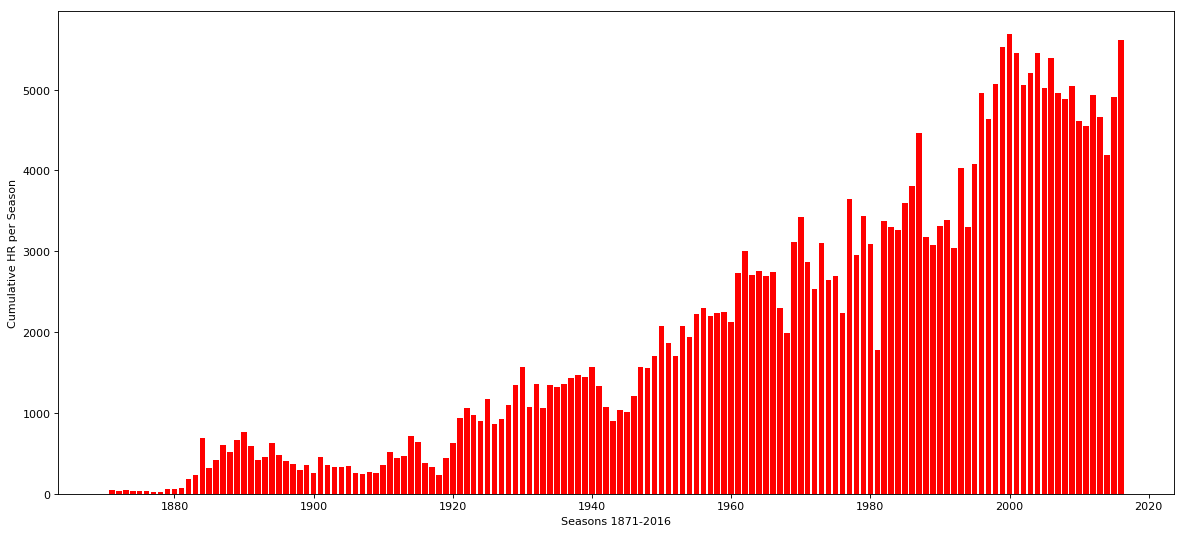

In [26]:
#BONUS : Graph total HRs per season using bar graph

plot_df = batting_df.groupby(['yearID'], as_index= False).sum()
plot_df = plot_df[['yearID', 'HR']] 
plt.figure(figsize=(18,8), dpi=80, facecolor='w', edgecolor='r')
plt.bar(plot_df['yearID'], plot_df['HR'], align = 'center', color='r')
plt.xlabel('Seasons 1871-2016')
plt.ylabel('Cumulative HR per Season')
plt.show()

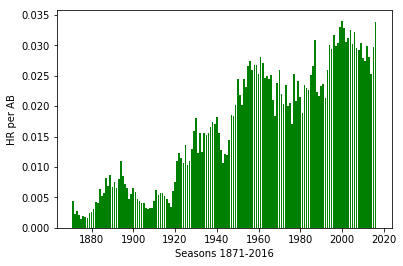

In [27]:
#BONUS : Using a line graph please graph the average HRs per AB (think about this) per season
batting = batting_df.groupby('yearID',as_index=False).sum()
batting['HRperAB'] = batting['HR']/batting['AB']

plt.bar(batting['yearID'], batting['HRperAB'], color='g')
plt.xlabel('Seasons 1871-2016')
plt.ylabel('HR per AB')
plt.show()